<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Importing modules
    </div>


In [1]:
import praw
import pandas as pd
from datetime import datetime
import pprint
import time
import requests
import seaborn as sns 
from matplotlib import rcParams
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import re
import contractions
from spellchecker import SpellChecker
import warnings
warnings.filterwarnings("ignore")
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sata\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sata\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sata\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sata\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sata\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Initialize Reddit API
</div>

In [2]:
reddit = praw.Reddit(client_id='HnvdWDqtG7121iDAOikvTw', client_secret='MnDQL9slZgG19ORF6ItBWqXLzMt2Bg', user_agent='master')



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Determine Available Attributes </div>

In [3]:
pprint.pprint(vars(reddit.subreddit('emacs').new()))


{'_exhausted': False,
 '_list_index': None,
 '_listing': None,
 '_reddit': <praw.reddit.Reddit object at 0x0000021A71A33880>,
 'limit': 100,
 'params': {'limit': 100},
 'url': 'r/emacs/new',
 'yielded': 0}



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Scrape the emacs&vim data and convert them to csv files </div>

In [4]:
def scrape_reddit_posts(subreddit_name, start_date, end_date):
    """
    Scrapes Reddit posts from a specified subreddit within a given time period.
    
    :param subreddit_name: The name of the subreddit to scrape.
    :param start_date: The start date of the time period (datetime object).
    :param end_date: The end date of the time period (datetime object).
    
    :return: A pandas DataFrame containing the scraped post data.
    """
    # Create an empty list to store post data
    all_post_data = []

    # Get the subreddit
    subreddit = reddit.subreddit(subreddit_name)

    # Iterate through submissions in the specified time period
    for submission in subreddit.new(limit=None):
        created_at = datetime.utcfromtimestamp(submission.created_utc)

        # Check if the submission is within the specified time period
        if start_date <= created_at <= end_date:
            post_id = submission.id
            is_over_18 = submission.over_18
            upvotes = submission.score
            comments = submission.num_comments
            author = submission.author.name if submission.author else "Unknown"
            title = submission.title
            # Collect post flair
            post_flair = submission.link_flair_text
            # Append post data to the list, including the new metrics
            post_data = [author, upvotes, comments, created_at, title, is_over_18, post_flair]
            all_post_data.append(post_data)

    # Create a DataFrame from the collected data
    columns = ['Author', 'Upvotes', 'Comments', 'Created_At', 'Title', 'NSFW', 'Post_Flair']
    df = pd.DataFrame(all_post_data, columns=columns)

    # Save the DataFrame as a CSV file
    filename = f'{subreddit_name}_reddit_posts.csv'
    df.to_csv(filename, index=False)
    
    return df


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
emacs dataframe </div>

In [5]:
# Define the time period
end_date = datetime(2023, 12, 17)
start_date = datetime(2023, 9, 17)

# Example usage:
subreddit_name = 'emacs'
df_emacs=scrape_reddit_posts(subreddit_name, start_date, end_date)

In [6]:
df_emacs

,Author,Upvotes,Comments,Created_At,Title,NSFW,Post_Flair
0,mkerrigan,2,2,2023-12-16 23:59:55,Coming up with a way to strip date suffixes,False,None
1,Unknown,7,36,2023-12-16 21:53:03,How do you use Emacs on Windows 11?,False,Question
2,vfclists,2,2,2023-12-16 21:45:37,How can I stop the embark-act notifications co...,False,None
3,rileyrgham,1,2,2023-12-16 18:37:12,desktop-save-mode and server/daemon,False,None
4,waterstrider123,3,13,2023-12-16 15:45:43,Random pauses while moving around in Emacs,False,Question
...,...,...,...,...,...,...,...
921,markrlondon,65,13,2023-09-21 03:38:34,This since from the Interview with an Emacs En...,False,None
922,breathe-out,15,0,2023-09-21 02:29:15,chordpro-mode.el version 2.1.0,False,Announcement
923,Zwzhhh,2,2,2023-09-21 02:11:22,Is it possible to make a child frame that has ...,False,None
924,mumbo1134,2,3,2023-09-20 23:43:18,Issue with emacs-29 reading xmodmap,False,None



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
vim dataframe </div>

In [7]:
subreddit_name = 'vim'
df_vim=scrape_reddit_posts(subreddit_name, start_date, end_date)

In [8]:
df_vim

,Author,Upvotes,Comments,Created_At,Title,NSFW,Post_Flair
0,idsfn,16,1,2023-12-16 22:58:15,The whole AOV challenge in 10sec using vim only,False,None
1,Ancient-Original48,9,24,2023-12-16 21:34:01,Remapping Caps Lock VIM,False,question
2,conceptcreatormiui,0,3,2023-12-16 17:59:57,Recreating VIM in VIM but naming it WP2 which ...,False,other
3,yurikoif,2,1,2023-12-16 17:03:47,Enhanced snippet/codegen functionality,False,None
4,Bioinfomagico,6,4,2023-12-16 15:36:36,[ VIM - 9.0 ][ Vimscript ] Is there a recommen...,False,question
...,...,...,...,...,...,...,...
377,ichimei0125,0,4,2023-09-17 21:34:34,About vim/Neovim config,False,None
378,dustractor,7,10,2023-09-17 20:52:48,Perhaps of interest to those of you who use vi...,False,None
379,bzsearch,0,15,2023-09-17 17:05:31,"Noob Vim user here, is there a package to help...",False,None
380,_kdheepak_,9,0,2023-09-17 14:30:17,"Hi all, I've made a new release for panvimdoc:...",False,None


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Analyzing Metrics: A Cross-Subreddit Comparison </div>

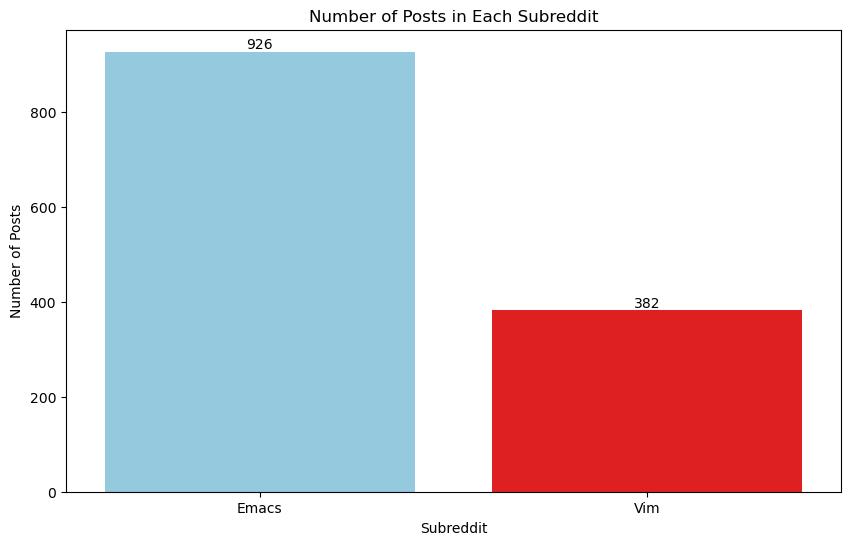

In [9]:
# Count the number of posts in each subreddit
num_posts_emacs = df_emacs.shape[0]
num_posts_vim = df_vim.shape[0]

# Data for plotting
subreddits = ['Emacs', 'Vim']
num_posts = [num_posts_emacs, num_posts_vim]

# Creating the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=subreddits, y=num_posts, palette=['skyblue', 'red'])
plt.title('Number of Posts in Each Subreddit')
plt.ylabel('Number of Posts')
plt.xlabel('Subreddit')
for i, count in enumerate(num_posts):
    plt.text(i, count, str(count), ha = 'center', va = 'bottom')
plt.show()

In [10]:
def plot_distribution(df1, df2, column, title):
    """
    Function to plot the distribution of a given column for two dataframes.
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(df1[column], color="skyblue", label=f'emacs', kde=True)
    sns.histplot(df2[column], color="red", label=f'vim', kde=True)
    plt.title(title)
    plt.legend()
    plt.show()



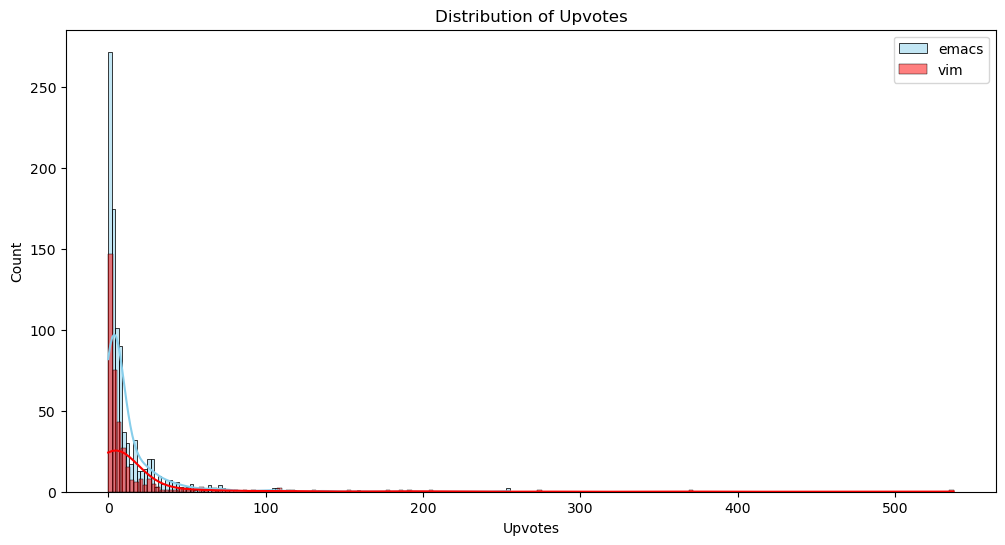

In [11]:
# 1. Distribution of Upvotes
plot_distribution(df_emacs, df_vim, 'Upvotes', 'Distribution of Upvotes')


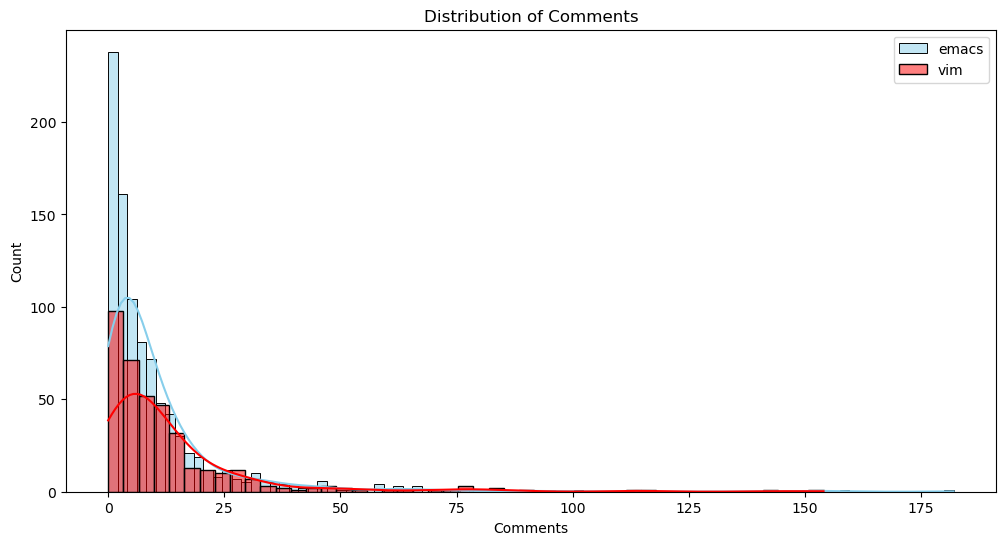

In [12]:
plot_distribution(df_emacs, df_vim, 'Comments', 'Distribution of Comments')


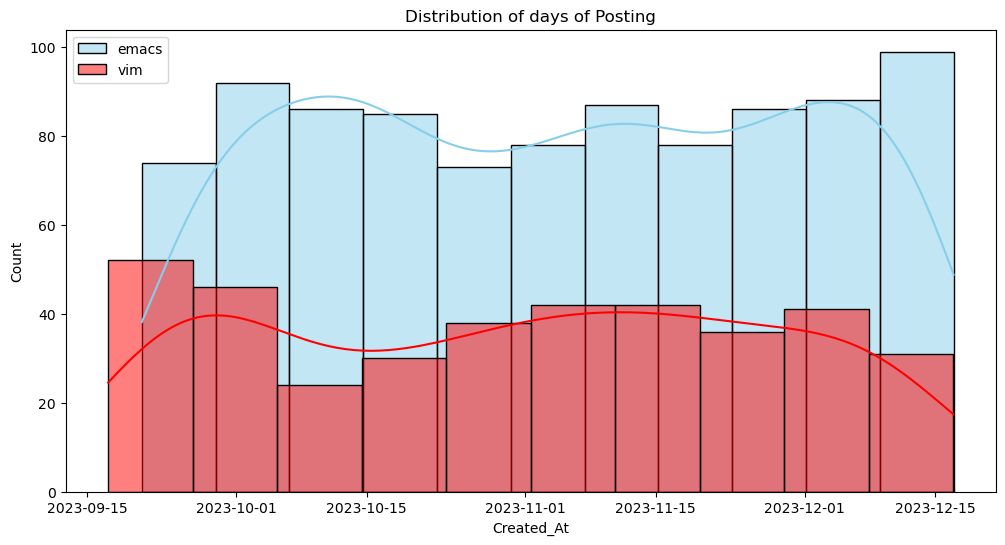

In [13]:
plot_distribution(df_emacs, df_vim, 'Created_At', 'Distribution of days of Posting')

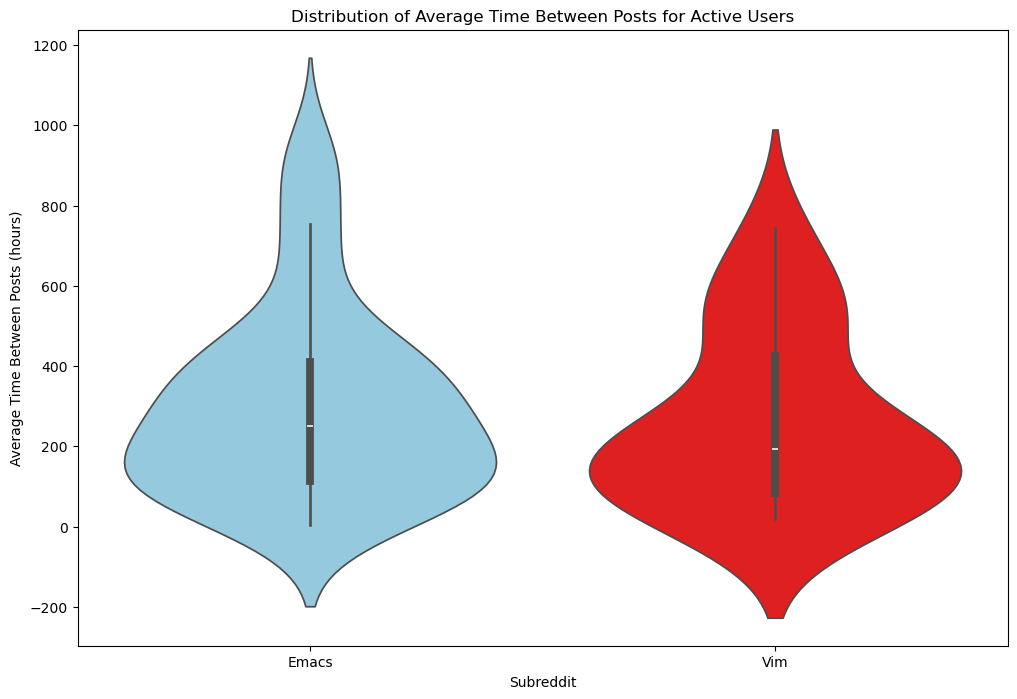

In [14]:
# Calculating the time difference between consecutive posts for each user in both subreddits
df_emacs_sorted = df_emacs.sort_values(by=['Author', 'Created_At'])
df_vim_sorted = df_vim.sort_values(by=['Author', 'Created_At'])

df_emacs_sorted['Time_Diff'] = df_emacs_sorted.groupby('Author')['Created_At'].diff().dt.total_seconds().div(3600)  # in hours
df_vim_sorted['Time_Diff'] = df_vim_sorted.groupby('Author')['Created_At'].diff().dt.total_seconds().div(3600)  # in hours

# Compute the average time difference for each user
avg_time_diff_emacs = df_emacs_sorted.groupby('Author')['Time_Diff'].mean()
avg_time_diff_vim = df_vim_sorted.groupby('Author')['Time_Diff'].mean()


# Filter authors with at least 3 posts to ensure sufficient data for averaging
min_posts = 3
filtered_authors_emacs = df_emacs_sorted['Author'].value_counts()[df_emacs_sorted['Author'].value_counts() >= min_posts].index
filtered_authors_vim = df_vim_sorted['Author'].value_counts()[df_vim_sorted['Author'].value_counts() >= min_posts].index

avg_time_diff_emacs_filtered = avg_time_diff_emacs[avg_time_diff_emacs.index.isin(filtered_authors_emacs)]
avg_time_diff_vim_filtered = avg_time_diff_vim[avg_time_diff_vim.index.isin(filtered_authors_vim)]

# Combining data for plot
combined_data = pd.DataFrame({
    'Subreddit': ['Emacs'] * len(avg_time_diff_emacs_filtered) + ['Vim'] * len(avg_time_diff_vim_filtered),
    'Average Time Between Posts (hours)': pd.concat([avg_time_diff_emacs_filtered, avg_time_diff_vim_filtered])
})

# Plotting
plt.figure(figsize=(12, 8))
sns.violinplot(x='Subreddit', y='Average Time Between Posts (hours)', data=combined_data, palette=['skyblue', 'red'])
plt.title('Distribution of Average Time Between Posts for Active Users')
plt.ylabel('Average Time Between Posts (hours)')
plt.xlabel('Subreddit')
plt.show()

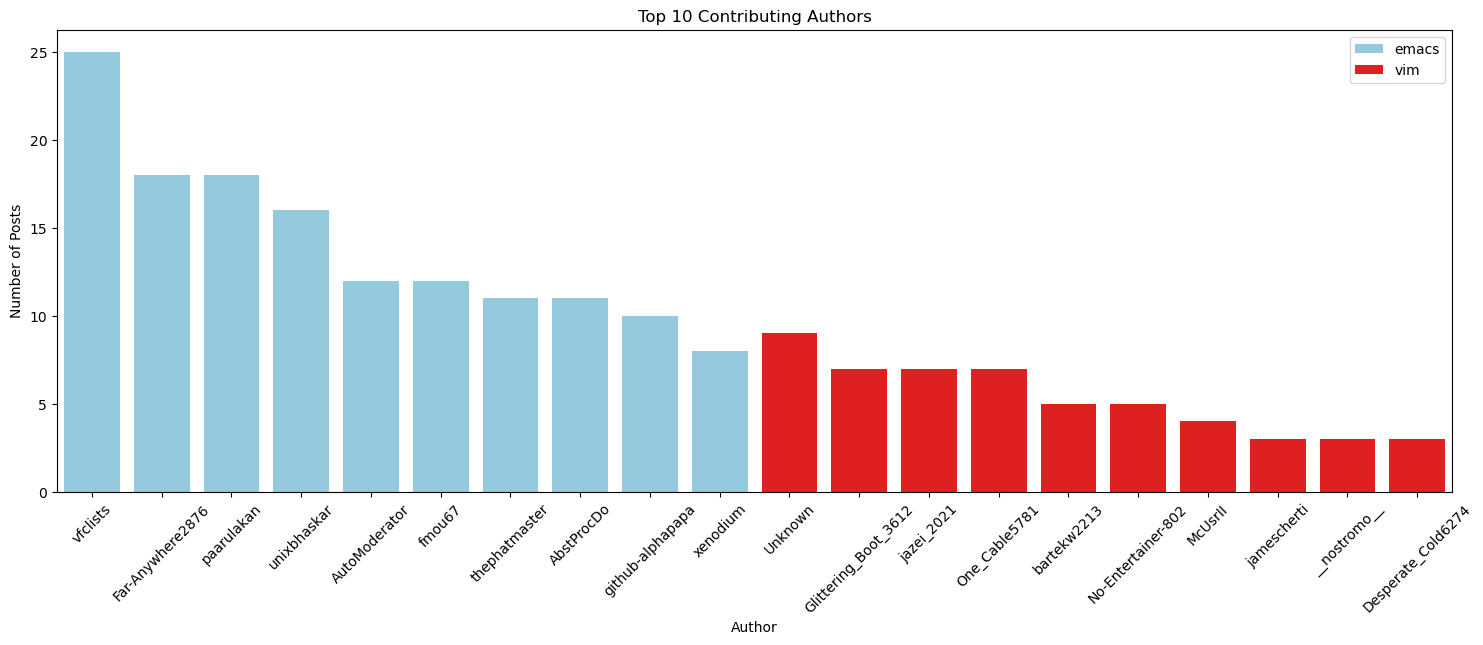

In [15]:
# Combine the data from both dataframes
combined_df = pd.concat([df_emacs, df_vim])

# Get the top 10 contributing authors for each subreddit
top_emacs_authors = df_emacs['Author'].value_counts().head(10).index
top_vim_authors = df_vim['Author'].value_counts().head(10).index

# Create a bar plot for the top authors
plt.figure(figsize=(18, 6))

sns.barplot(x=top_emacs_authors, y=df_emacs['Author'].value_counts().head(10), color='skyblue', label='emacs')
sns.barplot(x=top_vim_authors, y=df_vim['Author'].value_counts().head(10), color='red', label='vim')

plt.title('Top 10 Contributing Authors')
plt.xlabel('Author')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

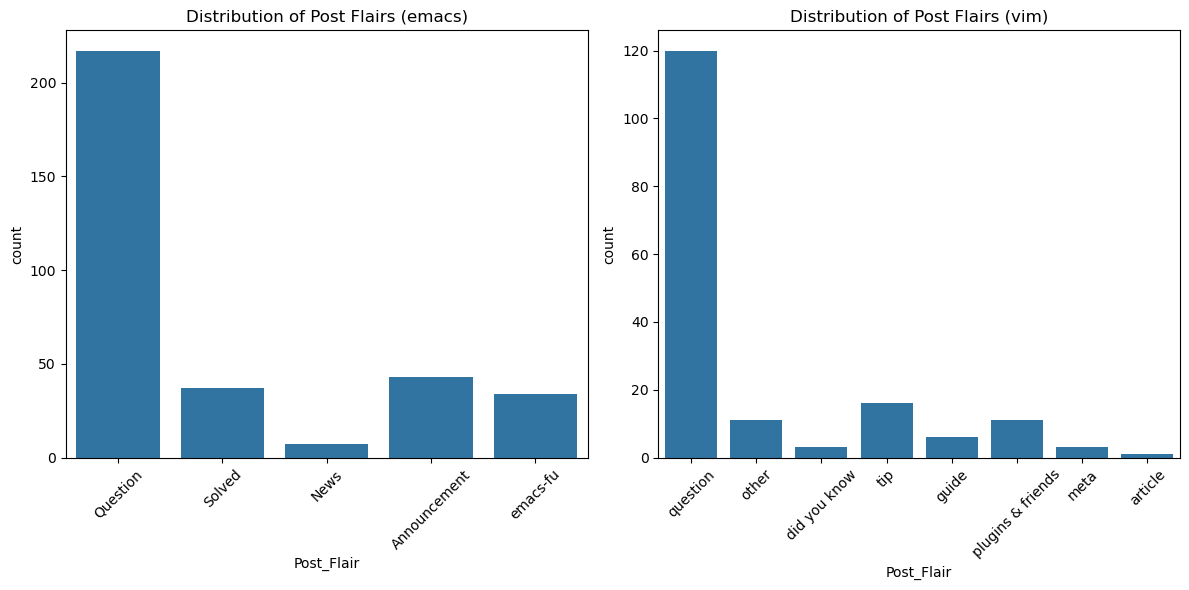

In [16]:
if df_emacs['Post_Flair'].notnull().sum() > 0 and df_vim['Post_Flair'].notnull().sum() > 0:
    plt.figure(figsize=(12, 6))
    
    # Create a countplot for df_emacs
    plt.subplot(1, 2, 1)
    sns.countplot(x='Post_Flair', data=df_emacs)
    plt.title('Distribution of Post Flairs (emacs)')
    plt.xticks(rotation=45)
    
    # Create a countplot for df_vim
    plt.subplot(1, 2, 2)
    sns.countplot(x='Post_Flair', data=df_vim)
    plt.title('Distribution of Post Flairs (vim)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print("No post flairs found in either dataframe.")


In [17]:
def generate_and_display_wordcloud(df, title):
    """
    Generates and displays a word cloud for a given dataframe based on the titles of posts.
    
    :param df: DataFrame containing the subreddit data
    :param title: Title for the word cloud
    """
    # Combining all titles from the dataframe
    all_titles = ' '.join(df['Title'].dropna())

    # Generating the word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_titles)

    # Displaying the generated image
    plt.figure(figsize=(8, 8), facecolor=None) 
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(title)
    plt.show()


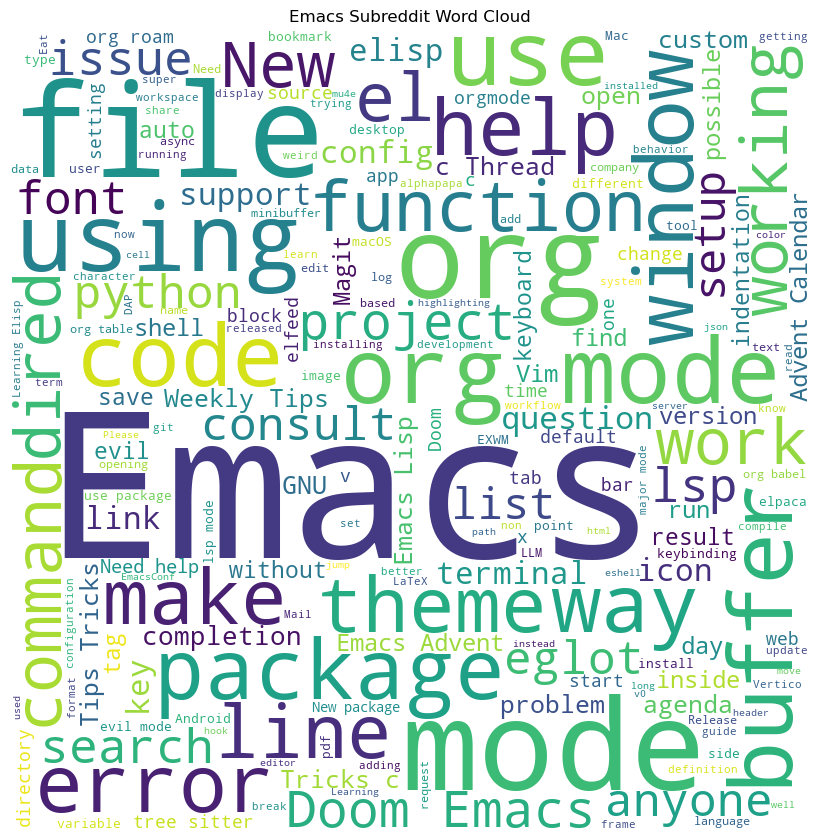

In [18]:
generate_and_display_wordcloud(df_emacs, 'Emacs Subreddit Word Cloud') 


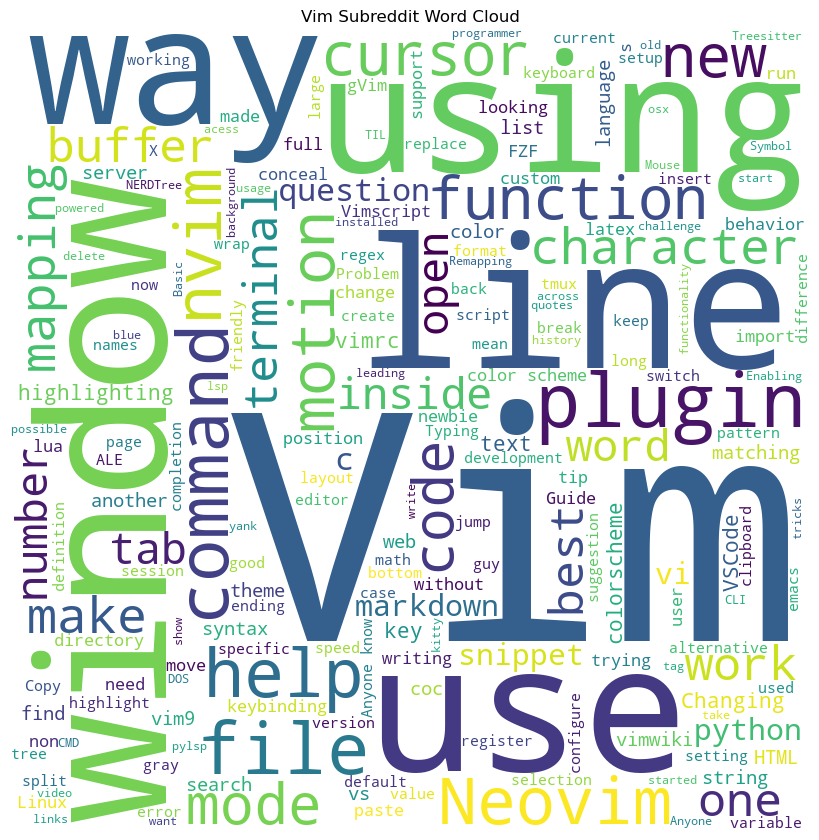

In [19]:
generate_and_display_wordcloud(df_vim, 'Vim Subreddit Word Cloud')  


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
simple sentiment analysis on Titles (Emacs) </div>

In [20]:
titles_df_emacs=df_emacs["Title"]
titles_df_emacs

0            Coming up with a way to strip date suffixes
1                    How do you use Emacs on Windows 11?
2      How can I stop the embark-act notifications co...
3                    desktop-save-mode and server/daemon
4             Random pauses while moving around in Emacs
                             ...                        
921    This since from the Interview with an Emacs En...
922                       chordpro-mode.el version 2.1.0
923    Is it possible to make a child frame that has ...
924                  Issue with emacs-29 reading xmodmap
925    Version 4.3.0 of the Modus themes has been rel...
Name: Title, Length: 926, dtype: object

# **Text preprocessing**


In [21]:
def preprocess_text(df):
    """
    Preprocesses tweets in a DataFrame by converting characters to lowercase, expanding shortened words,
    removing numbers, punctuation, and URLs.
    
    :param df: DataFrame containing tweets.
    
    :return: DataFrame with preprocessed tweets.
    """
    # Convert characters to lowercase
    df = df.str.lower()
    
    # Expand shortened words
    df = df.apply(lambda x: contractions.fix(x))
    
    # Remove numbers from text
    df = df.str.replace('\d+', '', regex=True)
    
    # Remove punctuation from text
    df = df.str.replace("[^\w\s]", "", regex=True)
    
    # Remove URLs from tweets
    df = df.str.replace(r"http\S+|www\S+|https\S+", "", regex=True)
    
    return df

In [22]:
preprocessed_emacs_df=preprocess_text(titles_df_emacs)
preprocessed_emacs_df

0            coming up with a way to strip date suffixes
1                       how do you use emacs on windows 
2      how can i stop the embarkact notifications con...
3                       desktopsavemode and serverdaemon
4             random pauses while moving around in emacs
                             ...                        
921    this since from the interview with an emacs en...
922                              chordpromodeel version 
923    is it possible to make a child frame that has ...
924                     issue with emacs reading xmodmap
925       version  of the modus themes has been released
Name: Title, Length: 926, dtype: object

In [23]:
def analyze_sentiment(data):
    analysis = SIA().polarity_scores(data)
    if analysis['compound'] > 0:
        return 'Positive'
    elif analysis['compound'] == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [24]:
sentiments_emacs = preprocessed_emacs_df.apply(lambda x : analyze_sentiment(x))
sentiments_emacs

0       Neutral
1       Neutral
2      Negative
3       Neutral
4       Neutral
         ...   
921    Positive
922     Neutral
923     Neutral
924     Neutral
925     Neutral
Name: Title, Length: 926, dtype: object

In [25]:
def create_sentiment_pie_chart(sentiment_data):
    """
    Create a pie chart to visualize sentiment analysis results.

    Args:
        sentiment_data (pd.Series): A Pandas Series containing sentiment labels.

    Returns:
        None (displays the pie chart).
    """
    # Count the occurrences of each sentiment label
    sentiment_counts = sentiment_data.value_counts()

    # Define colors for the pie chart segments
    colors = sns.color_palette('pastel')[0:len(sentiment_counts)]

    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title('Sentiment Analysis ')

    # Add a circle in the center to make it look like a donut chart (optional)
    circle = plt.Circle((0, 0), 0.70, fc='white')
    plt.gca().add_artist(circle)

    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

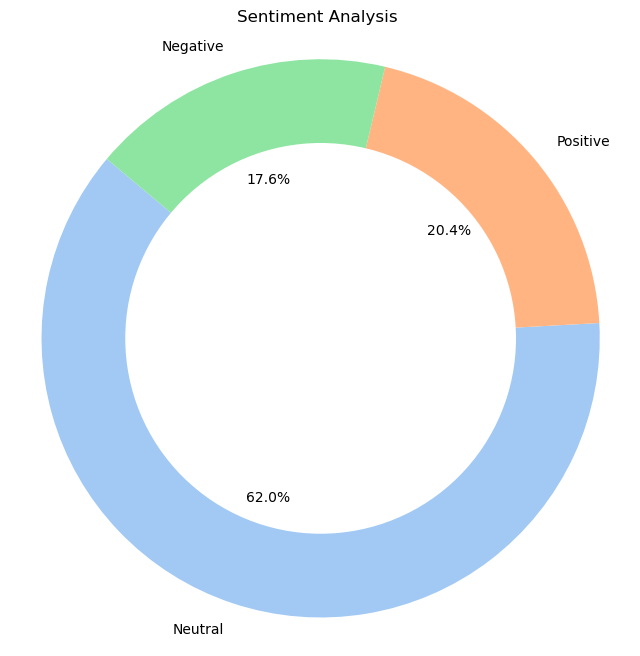

In [26]:
create_sentiment_pie_chart(sentiments_emacs)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
simple sentiment analysis on Titles (Vim) </div>

In [27]:
titles_df_vim=df_vim["Title"]
preprocessed_vim_df=preprocess_text(titles_df_vim)
preprocessed_vim_df

0          the whole aov challenge in sec using vim only
1                                remapping caps lock vim
2      recreating vim in vim but naming it wp which r...
3                  enhanced snippetcodegen functionality
4       vim    vimscript  is there a recommended way ...
                             ...                        
377                               about vimneovim config
378    perhaps of interest to those of you who use vi...
379    noob vim user here is there a package to help ...
380     hi all i have made a new release for panvimdoc v
381                        nerdtree disappears in scroll
Name: Title, Length: 382, dtype: object

In [28]:
sentiments_vim = preprocessed_vim_df.apply(lambda x : analyze_sentiment(x))
sentiments_vim

0      Positive
1       Neutral
2      Positive
3       Neutral
4      Positive
         ...   
377     Neutral
378    Positive
379    Positive
380     Neutral
381    Negative
Name: Title, Length: 382, dtype: object

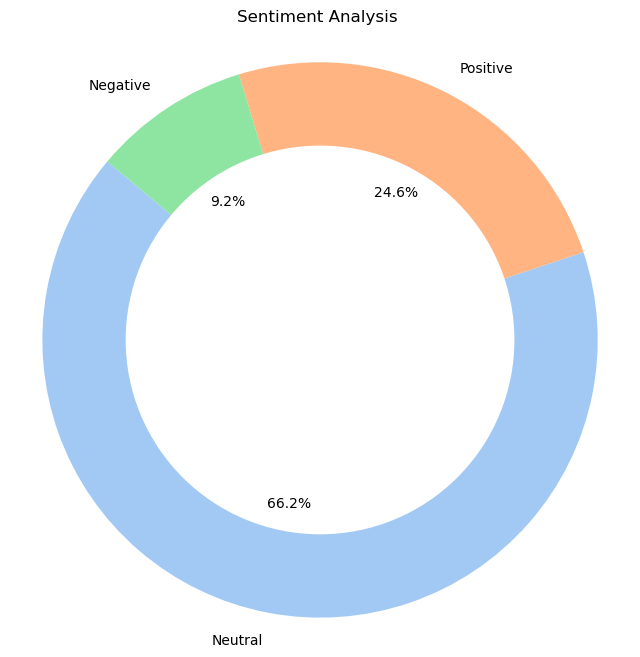

In [29]:
create_sentiment_pie_chart(sentiments_vim)